In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_100 = pd.read_csv('schelling_values_100_model_2.csv',delimiter=";")
df_1000 = pd.read_csv('schelling_values_1000_model_2.csv',delimiter=";")
df_100= df_100[df_100['number of iterations'] !=30000]
df_100 = df_100.groupby('vacant').mean()
df_1000 = df_1000.groupby('vacant').mean()

In [ ]:
df_1000['interratial pears dif'] = df_1000['mean interratial pears final'] - df_1000['mean interratial pears inicial']

In [ ]:
plt.plot(df_1000.index,df_1000['interratial pears dif'],'bo')

In [ ]:
df = pd.read_csv('schelling_optimization_size_0-01.csv',delimiter=";")
plt.plot(df['size'],df['optimized time(s)'],'bo',label="Optimazed")
plt.plot(df['size'],df['normal time(s)'],'ro',label="normal")
plt.xlabel("size")
plt.ylabel("Time")
plt.legend()

In [ ]:
df = pd.read_csv('schelling_optimization_empty_50.csv',delimiter=";")
plt.plot(df['empty'],df['optimized time(s)'],'bo',label="Optimazed")
plt.plot(df['empty'],df['normal time(s)'],'ro',label="normal")
plt.xlabel("empty")
plt.ylabel("Time")
plt.xscale('log')
plt.legend()

In [38]:
df2 = pd.read_csv('schelling_values_100_model_2_30.csv',delimiter=";")
df3 = pd.read_csv('schelling_values_100_model_3_30.csv',delimiter=";")
df2 = df2.where(df2['number of iterations']!=30000)
df3 = df3.where(df3['number of iterations']!=30000)
indexes = df2['vacant'].drop_duplicates().dropna()
cols = ['vacant','similarity ratio inicial','mean dissatisfaction inicial','mean interratial pears inicial','similarity ratio final',\
        'mean dissatisfaction final','mean interratial pears final','number of iterations']
deviation2 = pd.DataFrame(columns=cols)
deviation3 = pd.DataFrame(columns=cols)
count  =0
for i in indexes:
    deviation2.loc[count] = df2.where(df2['vacant']==i).std()
    deviation3.loc[count] = df3.where(df3['vacant']==i).std()
    count +=1
df2 = df2.groupby("vacant").mean()
df3 = df3.groupby("vacant").mean()

In [40]:
print(len(deviation2.index))
print(df2.index)

99
Float64Index([              0.01, 0.0104761575278966, 0.0109749876549305,
              0.0114975699539773, 0.0120450354025878, 0.0126185688306602,
              0.0132194114846602, 0.0138488637139387, 0.0145082877849593,
              0.0151991108295293, 0.0159228279334109, 0.0166810053720005,
              0.0174752840000768, 0.0183073828029536, 0.0191791026167248,
              0.0200923300256504, 0.0210490414451202, 0.0220513073990304,
              0.0231012970008316, 0.0242012826479438, 0.0253536449397011,
              0.0265608778294668, 0.0278255940220712, 0.0291505306282517,
              0.0305385550883341, 0.0319926713779738, 0.0335160265093884,
              0.0351119173421513, 0.0367837977182863, 0.0385352859371052,
              0.0403701725859655, 0.0422924287438949, 0.0443062145758388,
              0.0464158883361277, 0.0486260158006535, 0.0509413801481638,
              0.0533669923120631, 0.0559081018251222, 0.0585702081805666,
              0.0613590727341317, 0

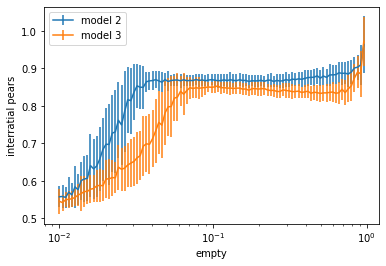

In [42]:
plt.errorbar(df2.index,df2['mean interratial pears final'],yerr=deviation2['mean interratial pears final'],label="model 2")
plt.errorbar(df3.index,df3['mean interratial pears final'],yerr=deviation3['mean interratial pears final'],label="model 3")
plt.xlabel("empty")
plt.ylabel("interratial pears")
plt.xscale('log')
plt.legend()